In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
%matplotlib inline

2024-08-21 16:30:24.361699: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-21 16:30:24.554010: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-21 16:30:24.803044: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-21 16:30:25.006574: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-21 16:30:25.008017: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-21 16:30:25.363736: I tensorflow/core/platform/cpu_feature_guard.cc:

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

In [4]:
#Shape of Each Training Set
X_train[0].shape

(28, 28)

<Figure size 640x480 with 0 Axes>

<Figure size 50x30 with 0 Axes>

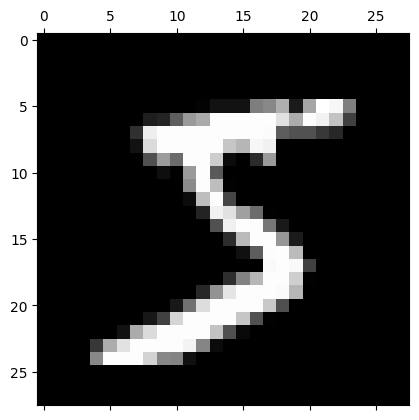

In [5]:
#Preview of each Training Set
plt.gray()
plt.figure(figsize=(0.5,0.3))
plt.matshow(X_train[0])

In [6]:
X_trainf = X_train.reshape(len(X_train),28*28)
X_testf = X_test.reshape(len(X_test),28*28)

In [7]:
y_train[0]

5

In [8]:
# Feature Scaling
xsc = MinMaxScaler()
X_trains = xsc.fit_transform(X_trainf)
X_tests = xsc.fit_transform(X_testf)

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(units= 100, activation= "relu"),
    Dense(units= 50, activation= "relu"),
    Dense(units= 10, activation= "sigmoid")
])

# tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq= 1) #Calling Logs

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics= ['accuracy']

)

# model.fit(X_trains,y_train,epochs= 10,callbacks= [tb_callback])

In [10]:
# prediction added
prediction = model.predict(X_tests)
print(prediction[15])
print(f"Number: {np.argmax(prediction[15])}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[0.4984858  0.5286004  0.49707645 0.58595777 0.57587254 0.4367921
 0.5111883  0.47815123 0.51800054 0.39940485]
Number: 3


In [11]:
model.evaluate(X_tests,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1647 - loss: 2.3031


[2.3007593154907227, 0.1573999971151352]

In [12]:
# List comprehension having predicted numbers
y_predicted = [np.argmax(i) for i in prediction]
cm  = tf.math.confusion_matrix(y_test,y_predicted)

Text(0.5, 1.0, 'Confusion Matrix')

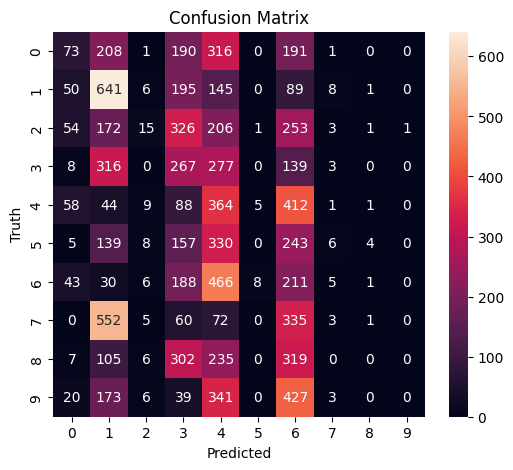

In [13]:
plt.figure(figsize=(6,5))
sns.heatmap(cm,annot = True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion Matrix")

In [14]:
# Defining Root_Log_Directory
import os
root_logdir = os.path.join(os.curdir,"my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir,run_id)

run_logdir = get_run_logdir()

In [16]:
tensorboard_cb = keras.callbacks.TensorBoard()
history = model.fit(X_trains,y_train,epochs= 15, callbacks=[tensorboard_cb])

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8673 - loss: 0.4604
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9641 - loss: 0.1186
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9741 - loss: 0.0830
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9812 - loss: 0.0610
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9853 - loss: 0.0463
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9874 - loss: 0.0406
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9900 - loss: 0.0299
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9915 - loss: 0.0272
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9922 - loss: 0.0233
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9936 - loss: 0.0189
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9928 - loss: 0.0199
Epoch 12/15
1875/1875 ━━━━━━━━